In [108]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [1]:
# #listing - MLSes
# chicago_list = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_chicago_property_listings.csv", low_memory=False)
# dallas_list = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_dallas_property_listings.csv", low_memory=False)
# denver_list = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_denver_property_listings.csv", low_memory=False)

# #properties-MLSes
# chicago_prop = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_chicago_properties.csv", low_memory=False)
# dallas_prop = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_dallas_properties.csv", low_memory=False)
# denver_prop = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/red_denver_properties.csv", low_memory=False)


In [3]:
chicago_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_chicago_property_listings.csv",
    low_memory=False)

In [7]:
chicago_list.shape

(1696381, 69)

In [67]:
chicago_list_clean = chicago_list.dropna(axis=1,how='all')
chicago_list_clean = chicago_list_clean.dropna(how='all')

In [26]:
chicago_list_clean.shape

(1696381, 60)

In [29]:
chicago_list_clean.columns

Index(['property_id', 'list_price', 'sold_price', 'original_list_price',
       'previous_price', 'seller_concessions', 'above_grade_square_feet',
       'total_square_feet', 'finished_square_feet',
       'derived_basement_square_feet', 'car_spaces', 'garages', 'beds',
       'baths', 'area', 'city', 'state', 'zip', 'county', 'structural_style',
       'property_type', 'architecture', 'year_built', 'lot_size_square_feet',
       'lot_size_acres', 'basement_finished_pct', 'basement_square_feet',
       'lat', 'lng', 'zoned', 'structural_type', 'is_attached', 'stories',
       'hoa_fee', 'unit_count'],
      dtype='object')

In [68]:
chicago_list_clean = chicago_list_clean.drop(columns=[
    'id', 'property_id', 'listing_number', 'status_changed_on', 'created_at',
    'updated_at', 'status', 'listed_on', 'contracted_on', 'off_market_on',
    'sold_on', 'subdivision', 'street', 'property_key',
    'externally_last_updated_at', 'photos', 'photos_pulled', 'public_remarks',
    'description', 'listing_agent', 'listing_brokerage', 'parcel_number',
    'private_remarks', 'price_changes', 'county_data_id', 'car_storage'
])

In [50]:
chicago_list_clean.head()

,list_price,sold_price,original_list_price,previous_price,seller_concessions,above_grade_square_feet,total_square_feet,finished_square_feet,derived_basement_square_feet,car_spaces,garages,beds,baths,area,city,state,zip,county,structural_style,property_type,architecture,year_built,lot_size_square_feet,lot_size_acres,basement_finished_pct,basement_square_feet,lat,lng,zoned,structural_type,is_attached,stories,hoa_fee,unit_count
0,19100.0,20154.0,19100.0,19100.0,0,1096.0,1096.0,1096.0,NaN,NaN,1.0,2.0,1.0,8049.0,CHICAGO,IL,60619,COOK,Townhouse-2 Story,Attached Single,NaN,1942.0,NaN,NaN,NaN,NaN,41.727149,-87.617485,NaN,Attached,1,2,0.0,NaN
1,289900.0,274000.0,315000.0,294900.0,0,2703.0,2703.0,2703.0,NaN,NaN,3.0,4.0,2.0,123.0,ELGIN,IL,60124,KANE,Condo,Detached Single,Colonial,1978.0,34352.0,1.0,NaN,NaN,42.009250,-88.370437,NaN,Detached,0,2,50.0,NaN
2,109900.0,108900.0,NaN,109900.0,0,2000.0,2000.0,2000.0,0.0,NaN,NaN,3.0,2.0,6007.0,SAVOY,IL,61874,CHAMPA,Cluster,Detached Single,Contemporary,NaN,9900.0,0.0,NaN,0.0,40.078350,-88.250626,NaN,Detached,0,1,0.0,NaN
3,64500.0,60000.0,NaN,64500.0,0,1170.0,1170.0,1170.0,0.0,NaN,NaN,3.0,1.0,6003.0,TUSCOLA,IL,61953,DOUGLA,Cluster,Detached Single,Bungalow,NaN,12351.0,0.0,NaN,0.0,39.803560,-88.280907,NaN,Detached,0,1,0.0,NaN
4,90000.0,81000.0,NaN,90000.0,0,1509.0,1509.0,1509.0,1292.0,NaN,NaN,3.0,1.0,6003.0,PHILO,IL,61874,CHAMPA,1/2 Duplex,Detached Single,NaN,NaN,17160.0,0.0,NaN,1292.0,40.000268,-88.160982,NaN,Detached,0,1,0.0,NaN


In [61]:
# chicago_list_clean['city'] = chicago_list_clean['city'].astype('category').cat.codes
# chicago_list_clean['state'] = chicago_list_clean['state'].astype('category').cat.codes
# chicago_list_clean['county'] = chicago_list_clean['county'].astype('category').cat.codes
# chicago_list_clean['structural_style'] = chicago_list_clean['structural_style'].astype('category').cat.codes
# chicago_list_clean['property_type'] = chicago_list_clean['property_type'].astype('category').cat.codes
# chicago_list_clean['architecture'] = chicago_list_clean['architecture'].astype('category').cat.codes
# chicago_list_clean['structural_type'] = chicago_list_clean['structural_type'].astype('category').cat.codes
# chicago_list_clean['zoned'] = chicago_list_clean['zoned'].astype('category').cat.codes

In [69]:
chicago_list_clean['zip'] = pd.to_numeric(chicago_list_clean['zip'], errors='coerce')
chicago_list_clean = chicago_list_clean.dropna(subset=['zip'])
chicago_list_clean['zip'] = chicago_list_clean['zip'].astype('int')

In [70]:
chicago_list_clean.dtypes

list_price                      float64
sold_price                      float64
original_list_price             float64
previous_price                  float64
seller_concessions                int64
above_grade_square_feet         float64
total_square_feet               float64
finished_square_feet            float64
derived_basement_square_feet    float64
car_spaces                      float64
garages                         float64
beds                            float64
baths                           float64
area                            float64
city                             object
state                            object
zip                               int64
county                           object
structural_style                 object
property_type                    object
architecture                     object
year_built                      float64
lot_size_square_feet            float64
lot_size_acres                  float64
basement_finished_pct           float64


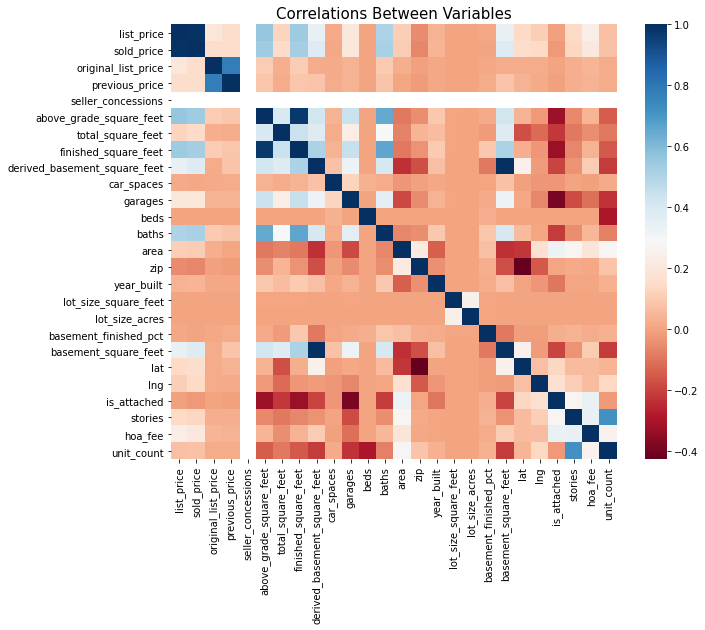

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(chicago_list_clean.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [93]:
important_num_cols = list(
    chicago_list_clean.corr()["sold_price"][(chicago_list_clean.corr()["sold_price"] > 0.50) | (
        chicago_list_clean.corr()["sold_price"] < -0.50)].index)

cat_cols = [
    "city", "state", "county", "structural_style", "property_type",
    "architecture", "structural_type", "zoned"
]

important_cols = important_num_cols + cat_cols

df = chicago_list_clean[important_cols]

In [94]:
df = df.dropna()

In [95]:
df.head()

,list_price,sold_price,above_grade_square_feet,finished_square_feet,baths,city,state,county,structural_style,property_type,architecture,structural_type,zoned
675,275000.0,260000.0,1788.0,1788.0,2.0,MOMENCE,IL,KANK,Cluster,Detached Single,Tri-Level,Detached,AGRIC
749,299900.0,299900.0,2171.0,2171.0,3.0,BOURBONNAIS,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL
757,167000.0,160000.0,1656.0,1656.0,2.0,BRADLEY,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL
791,109900.0,104000.0,1400.0,1400.0,2.0,KANKAKEE,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL
936,269900.0,259000.0,1800.0,2850.0,2.0,MANTENO,IL,KANK,1/2 Duplex,Detached Single,Traditional,Detached,SINGL


In [136]:
df.describe()

,list_price,sold_price,above_grade_square_feet,finished_square_feet,baths
count,6.385000e+03,6385.000000,6385.000000,6385.000000,6385.000000
mean,1.537803e+05,148269.132968,1663.579327,1737.972749,1.673297
std,8.550194e+04,83499.741498,632.019369,717.217652,0.784453
min,0.000000e+00,3500.000000,0.000000,0.000000,0.000000
25%,9.490000e+04,90000.000000,1245.000000,1262.000000,1.000000
50%,1.399000e+05,135000.000000,1561.000000,1600.000000,2.000000
75%,1.925000e+05,188000.000000,1944.000000,2020.000000,2.000000
max,1.199000e+06,830000.000000,10400.000000,10400.000000,25.000000


In [96]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
list_price                 0
sold_price                 0
above_grade_square_feet    0
finished_square_feet       0
baths                      0
city                       0
state                      0
county                     0
structural_style           0
property_type              0
architecture               0
structural_type            0
zoned                      0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [97]:
X = df.drop("sold_price", axis=1)
y = df["sold_price"]

In [98]:
X = pd.get_dummies(X, columns=cat_cols)

In [99]:
important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [102]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1140587733809.2722
MSE: 2.7288677674751893e+26
RMSE: 16519284995045.002
R2 Score: -3.6806385622885784e+16
------------------------------
RMSE Cross-Validation: 105239724095885.55


In [110]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6490.776313644309
MSE: 189710935.7561592
RMSE: 13773.559298749151
R2 Score: 0.9744121941651275
------------------------------
RMSE Cross-Validation: 10244.774878846303


In [111]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6488.332582394848
MSE: 190882862.54999062
RMSE: 13816.036426920371
R2 Score: 0.9742541271821478
------------------------------
RMSE Cross-Validation: 10525.18361915041


In [112]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20745.736261432998
MSE: 835307121.5487262
RMSE: 28901.68025476592
R2 Score: 0.8873355594737711
------------------------------
RMSE Cross-Validation: 30148.2961050782


In [113]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7209.091114306066
MSE: 524241360.18129
RMSE: 22896.317611818937
R2 Score: 0.9292914450004615
------------------------------
RMSE Cross-Validation: 15545.932886107938


In [114]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6478.142879501187
MSE: 125090915.45446436
RMSE: 11184.405011195919
R2 Score: 0.9831280044895812
------------------------------
RMSE Cross-Validation: 10084.888215147113


In [109]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6179.352327996525
MSE: 126862357.4176422
RMSE: 11263.319111951068
R2 Score: 0.9828890761809895
------------------------------
RMSE Cross-Validation: 9825.747357451119


In [115]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6903648498036.235
MSE: 3.546237020620419e+27
RMSE: 59550289844974.05
R2 Score: -4.783088753760783e+17
------------------------------
RMSE Cross-Validation: 105239724095885.55


In [116]:
models.sort_values(by="RMSE (Cross-Validation)") 

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
1,XGBRegressor,6.179352e+03,1.268624e+08,1.126332e+04,9.828891e-01,9.825747e+03
6,RandomForestRegressor,6.478143e+03,1.250909e+08,1.118441e+04,9.831280e-01,1.008489e+04
2,Ridge,6.490776e+03,1.897109e+08,1.377356e+04,9.744122e-01,1.024477e+04
3,Lasso,6.488333e+03,1.908829e+08,1.381604e+04,9.742541e-01,1.052518e+04
5,SVR,7.209091e+03,5.242414e+08,2.289632e+04,9.292914e-01,1.554593e+04
4,ElasticNet,2.074574e+04,8.353071e+08,2.890168e+04,8.873356e-01,3.014830e+04
0,LinearRegression,1.140588e+12,2.728868e+26,1.651928e+13,-3.680639e+16,1.052397e+14
7,Polynomial Regression (degree=2),6.903648e+12,3.546237e+27,5.955029e+13,-4.783089e+17,1.052397e+14


In [154]:
models['Normalized RMSE'] = models["RMSE (Cross-Validation)"] / (max(df.sold_price) - min(df.sold_price))

In [156]:
models.sort_values(by="Normalized RMSE") 

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation),Normalized RMSE
1,XGBRegressor,6.179352e+03,1.268624e+08,1.126332e+04,9.828891e-01,9.825747e+03,1.188838e-02
6,RandomForestRegressor,6.478143e+03,1.250909e+08,1.118441e+04,9.831280e-01,1.008489e+04,1.220192e-02
2,Ridge,6.490776e+03,1.897109e+08,1.377356e+04,9.744122e-01,1.024477e+04,1.239537e-02
3,Lasso,6.488333e+03,1.908829e+08,1.381604e+04,9.742541e-01,1.052518e+04,1.273464e-02
5,SVR,7.209091e+03,5.242414e+08,2.289632e+04,9.292914e-01,1.554593e+04,1.880936e-02
4,ElasticNet,2.074574e+04,8.353071e+08,2.890168e+04,8.873356e-01,3.014830e+04,3.647707e-02
0,LinearRegression,1.140588e+12,2.728868e+26,1.651928e+13,-3.680639e+16,1.052397e+14,1.273318e+08
7,Polynomial Regression (degree=2),6.903648e+12,3.546237e+27,5.955029e+13,-4.783089e+17,1.052397e+14,1.273318e+08


In [125]:
models2 = models.drop([0, 7])

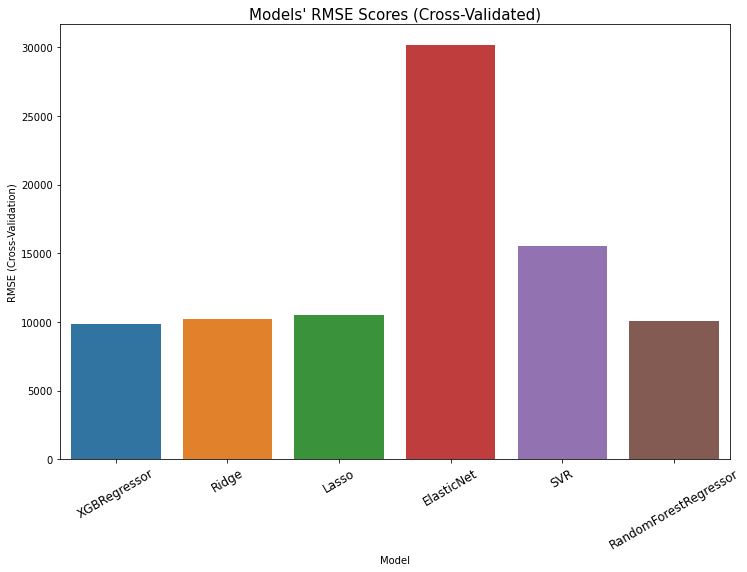

In [126]:
plt.figure(figsize=(12,8))
sns.barplot(x=models2["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

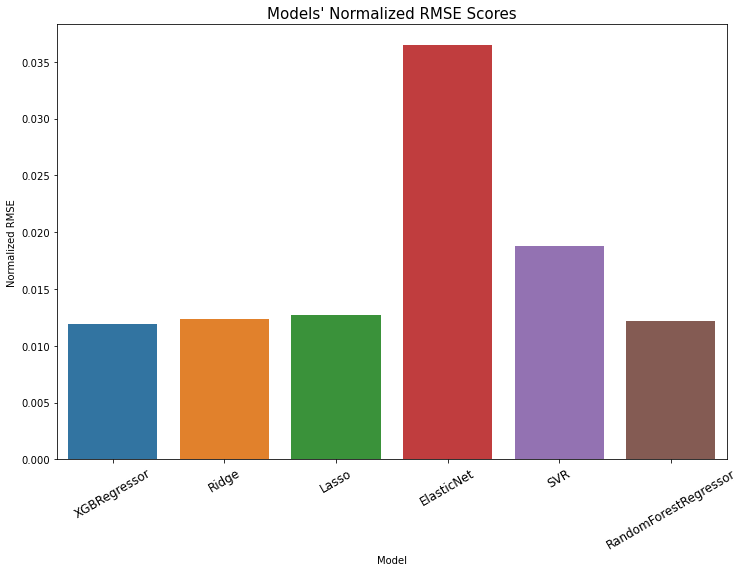

In [157]:
plt.figure(figsize=(12,8))
sns.barplot(x=models2["Model"], y=models["Normalized RMSE"])
plt.title("Models' Normalized RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

Since the RMSE value of XGBRegressor is lowest, we would select XGBRegressor as the best model for predicting house prices since the average distance between the predicted prices and the actual prices is lowest for that model.

In [161]:
df.to_csv('Test.csv')

In [164]:
test_data = pd.read_csv('test_data_1.csv')

In [165]:
test_data = pd.get_dummies(test_data, columns=cat_cols)
test_data[important_num_cols] = scaler.fit_transform(test_data[important_num_cols])

In [184]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

ValueError: Feature shape mismatch, expected: 265, got 266

In [145]:
df_result_xgb = pd.DataFrame(X_test)

In [147]:
df_result_xgb['Estimated_Price'] = predictions

In [148]:
df_result_xgb

,list_price,above_grade_square_feet,finished_square_feet,baths,city_ALLERTON,city_AROMA PARK,city_ASHKUM,city_Anchor,city_Ancona,city_Armstrong,city_Aroma Park,city_Ashkum,city_BEAVERVILLE,city_BONFIELD,city_BOURBONNAIS,city_BRADLEY,city_BUCKINGHAM,city_BUCKLEY,city_Beaverville,city_Blackstone,city_Bonfield,city_Bourbonnais,city_Braceville,city_Bradley,city_Buckingham,city_Buckley,city_CABERY,city_CATLIN,city_CHATSWORTH,city_CHEBANSE,city_CISNA PARK,city_CISSNA PARK,city_CLIFTON,city_CORNELL,city_CRESCENT CITY,city_CULLOM,city_Cabery,city_Catlin,city_Chatsworth,city_Chebanse,city_Chenoa,city_Cissna Park,city_Claytonville,city_Clifton,city_Cornell,city_Crescent City,city_Cropsey,city_Cullom,city_DANFORTH,city_DANVILLE,city_DONOVAN,city_DWIGHT,city_Danforth,city_Danville,city_Donovan,city_Dwight,city_ELLIOTT,city_ESSEX,city_El Paso,city_Elliott,city_Emington,city_Essex,city_FAIRBURY,city_FAIRMOUNT,city_FITHIAN,city_FORREST,city_Fairbury,city_Fairmount,city_Fithian,city_Flanagan,city_Forrest,city_GEORGETOWN,city_GIBSON CITY,city_GILMAN,city_GRANT PARK,city_Georgetown,city_Gibson City,city_Gilman,city_Grant Park,city_Graymont,city_Gridley,city_HERSCHER,city_HOOPESTON,city_HOPKINS PARK,city_Herscher,city_Hoopeston,city_Hudson,city_IROQUOIS,city_IRWIN,city_Iroquois,city_KANKAKEE,city_KEMPTON,city_Kankakee,city_Kempton,city_LODA,city_Lacon,city_Lexington,city_Loda,city_Long Point,city_MANTENO,city_MILFORD,city_MOMENCE,city_Manteno,city_Manville,city_Melvin,city_Milford,city_Minonk,city_Momence,city_OAKWOOD,city_ODELL,city_ONARGA,city_Oakwood,city_Odell,city_Onarga,city_Other,city_PAXTON,city_PEMBROKE TWP,city_PIPER CITY,city_PONTIAC,city_Papineau,city_Paxton,city_Pembroke Twp,city_Piper City,city_Pontiac,city_RANKIN,city_REDDICK,city_ROBERTS,city_Rankin,city_Ransom,city_Reddick,city_Roberts,city_Rockford,city_Rossville,city_SAUNEMIN,city_SHELDON,city_SIBLEY,city_SIDELL,city_ST. ANNE,city_STELLE,city_SUN RIVER TERRACE,city_Saunemin,city_Sheldon,city_Sibley,city_St. Anne,city_Stockland,city_Strawn,city_Streator,city_Sun River Terrace,city_THAWVILLE,city_Thawville,city_Tilton,city_UNION HILL,city_Union Hill,city_WATSEKA,city_WELLINGTON,city_WOODLAND,city_Watseka,city_Wellington,city_Westville,city_Woodland,state_IL,county_BOON,county_CHAMPA,county_DOUGLA,county_FORD,county_GRUN,county_IROQ,county_KANK,county_LASL,county_LVNG,county_MARS,county_MCLEAN,county_OTHR,county_VERM,county_VERMIL,county_WILL,county_WOODFO,structural_style_1/2 Duplex,"structural_style_1/2 Duplex, Condo","structural_style_1/2 Duplex, Flat","structural_style_1/2 Duplex, Low Rise (1-3 Stories)","structural_style_1/2 Duplex, Quad",structural_style_Cluster,"structural_style_Cluster, Corridor","structural_style_Cluster, Garden Complex","structural_style_Cluster, High Rise (7+ Stories)",structural_style_Condo,"structural_style_Condo, 1/2 Duplex","structural_style_Condo, Corridor","structural_style_Condo, Flat","structural_style_Condo, Garden Complex",structural_style_Condo-Duplex,"structural_style_Condo-Duplex, Flat",structural_style_Condo-Loft,structural_style_Flat,structural_style_Garden Complex,"structural_style_Garden Complex, 1/2 Duplex",structural_style_Garden Unit,structural_style_Low Rise (1-3 Stories),"structural_style_Low Rise (1-3 Stories), 1/2 Duplex","structural_style_Low Rise (1-3 Stories), Garden Complex",structural_style_MULTILVL,structural_style_Manor Home/Coach House/Villa,structural_style_P,structural_style_Quad,property_type_Detached Single,architecture_A-Frame,architecture_AD,architecture_American 4-Sq.,"architecture_American 4-Sq., Farmhouse","architecture_American 4-Sq., Other",architecture_Bi-Level,"architecture_Bi-Level, Ranch",architecture_Bungalow,"architecture_Bungalow, Prairie","architecture_Bungalow, Ranch",architecture_Cape Cod,"architecture_Cape Cod, Ranch",architecture_Colonial,"architecture_Colonial, Cape Cod","architecture_Colonial, Contemporary","architecture_Colonial, Traditional",architecture_Contemporary,"architecture_Contemporary,

In [ ]:
df_test = 

In [35]:
#listing - 1st American
american_list = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/ds_listings.csv", low_memory=False)

In [6]:
#assessor_records is the record of the past two sales
assesso_records = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/ds_assessor_records.csv", iterator=True)
                      #chunksize=200)


In [3]:
assesso_records_id = pd.read_csv(
    '/Users/maidat/Downloads/Privy/CSV/ds_assessor_records.csv', usecols=["propertyid"])
american_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/ds_listings.csv", usecols=["propertyid"])

#listing - MLSes
chicago_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_chicago_property_listings.csv", usecols=["county_data_id"])
dallas_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_dallas_property_listings.csv", usecols=["county_data_id"])
denver_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_denver_property_listings.csv", usecols=["county_data_id"])

# # properties-MLSes
# chicago_prop = pd.read_csv(
#     "/Users/maidat/Downloads/Privy/CSV/red_chicago_properties.csv", low_memory=False)
# dallas_prop = pd.read_csv(
#     "/Users/maidat/Downloads/Privy/CSV/red_dallas_properties.csv", low_memory=False)
# denver_prop = pd.read_csv(
#     "/Users/maidat/Downloads/Privy/CSV/red_denver_properties.csv", low_memory=False)

In [22]:
import modin.pandas as pd
import os
import ray
ray.init()

os.environ["MODIN_ENGINE"] = "dask"

df = pd.read_csv("/Users/maidat/Downloads/Privy/CSV/ds_assessor_records.csv")

2022-10-13 15:48:06,417	ERROR services.py:1363 -- Failed to start the dashboard: Failed to start the dashboard, return code 1
 The last 10 lines of /tmp/ray/session_2022-10-13_15-48-03_472966_55943/logs/dashboard.log:
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/maidat/opt/anaconda3/lib/python3.8/site-packages/ray/dashboard/modules/snapshot/snapshot_head.py", line 38, in <module>
    class RayActivityResponse(BaseModel, extra=Extra.allow):
  File "pydantic/main.py", line 324, in pydantic.main.ModelMetaclass.__new__
  File "/Users/maidat/opt/anaconda3/lib/python3.8/abc.py", line 85, in __new__
    cls = super().__new__(mcls, name, bases, namespace, **kwargs)
TypeError: __init_subclass__() takes no keyword arguments
2022-10-13 15:48:06,421	ERROR services.py:1364 -- Failed to start the dashboard, retu

KeyboardInterrupt: 

In [16]:
ray.shutdown()

In [8]:
assessor_subset = assesso_records.get_chunk(2000)  

## Steps:
- First of all clean the data - in this case clean NA, datatype, duplicate from propertyid/county_data_id columns 
- Using values from assessor_subset.propertyid check if they exist in mls_lising.county_data_id if TRUE append them to on_Mls dataframe.
- elsif check that values from assessor_subset.propertyid with listing.propertyid (from first American) if matched append them to on_1st_American dataframe. 
- else append them to Off_market dataframe.  


### Check Missing values of each dataset

In [4]:
chicago_list.county_data_id.isnull().sum()

316

In [5]:
dallas_list.county_data_id.isnull().sum()

17

In [6]:
denver_list.county_data_id.isnull().sum()

4

In [7]:
american_list.propertyid.isnull().sum()

90135

In [8]:
listing.propertyid.isnull().sum()/len(listing)*100

NameError: name 'listing' is not defined

### Clean Data

In [9]:
# CHECK FOR CHICAGO only 
#Drop  rows that have NA from county_data_id column
dropNA_chicago = chicago_list.iloc[chicago_list["county_data_id"].dropna().index] 

#Convert dtype of county_data_id column to np.int64
dropNA_chicago.loc[:,"county_data_id"] = dropNA_chicago.loc[:,"county_data_id"].astype(np.int64)

# seperate those rows have county_data_id = -1 
chicago_negative = dropNA_chicago[dropNA_chicago["county_data_id"] == -1] #maybe they are Off Market 
print("The number of row that have county_data_id equal -1 is ",len(chicago_negative)) 

chicago_clean =  dropNA_chicago[dropNA_chicago["county_data_id"] != -1]
chicago_clean
print(len(chicago_clean))
chicago_clean_dup = chicago_clean.drop_duplicates(keep='first', inplace=False, ignore_index=False)
print(len(chicago_clean_dup))

The number of row that have county_data_id equal -1 is  236902
1459163
961237


In [10]:
def clean_ID_data(df, id_name):
    """
    Input: 
        - df: dataframe needs to be cleaned
        - ID column name (as string)
    Output: 
        - df_clean: clean dataframe with the ID column that has no Nan, int64 type and NOT equal to -1
        - df_negative_id: dataframe with the ID column that has no Nan, int64 type and equal to -1 
    """
    #Drop  rows that have NA from county_data_id column
    df_dropNA = df[df[id_name].notna()] 

    #Convert dtype of county_data_id column to np.int64
    df_dropNA.loc[:,id_name] =  df_dropNA.loc[:,id_name].astype(np.int64)

    # seperate those rows have county_data_id = -1 
    df_negative_id =  df_dropNA[df_dropNA[id_name] == -1] #maybe they are Off Market 
    
    df_clean1 =  df_dropNA[df_dropNA[id_name] != -1] 
    df_clean =  df_clean1.drop_duplicates(keep='first', inplace=False, ignore_index=False)#drop duplicate rows
    
    return  df_clean, df_negative_id

In [11]:
chicago_list_clean = clean_ID_data(chicago_list, "county_data_id")[0]
dallas_list_clean = clean_ID_data(dallas_list, "county_data_id")[0]
denver_list_clean = clean_ID_data(denver_list, "county_data_id")[0]

In [12]:
assesso_records_id_clean = clean_ID_data(assesso_records_id, "propertyid")[0]
american_list_clean = clean_ID_data(american_list, "propertyid")[0]


### Creating ON-OFF Function

In [13]:
#only first 2000 rows 
id_list = assessor_subset_clean.propertyid.tolist()

#check 
#id_list = [170447293, 170447292, 170447294]
 
#assign new dataframe based on assessor record 
off_df = pd.DataFrame(columns=assessor_subset.columns)
on_Mls =  pd.DataFrame(columns=assessor_subset.columns)
on_1st_American =  pd.DataFrame(columns=assessor_subset.columns)

#loop to define ON/OFF 
for i in id_list: 
    if i in chicago_list_clean.county_data_id.tolist(): 
        on_Mls = on_Mls.append(assessor_subset_clean[assessor_subset_clean.propertyid == i])
        
    elif i in american_list_clean.propertyid.tolist(): 
        on_1st_American = on_1st_American.append(assessor_subset_clean[assessor_subset_clean.propertyid == i])
        
    else: 
        off_df = off_df.append(assessor_subset_clean[assessor_subset_clean.propertyid == i])

NameError: name 'assessor_subset_clean' is not defined

In [14]:
# only first 2000 rows
id_list = assesso_records_id_clean.propertyid.tolist()

# check
#id_list = [170447293, 170447292, 170447294]

# assign new dataframe based on assessor record
off_df = pd.DataFrame(columns=assesso_records_id.columns)
on_Mls = pd.DataFrame(columns=assesso_records_id.columns)
on_1st_American = pd.DataFrame(columns=assesso_records_id.columns)

# loop to define ON/OFF
for i in id_list:
    if i in chicago_list_clean.county_data_id.tolist():
        on_Mls = on_Mls.append(
            assesso_records_id_clean[assesso_records_id_clean.propertyid == i])

    elif i in american_list_clean.propertyid.tolist():
        on_1st_American = on_1st_American.append(
            assesso_records_id_clean[assesso_records_id_clean.propertyid == i])

    else:
        off_df = off_df.append(
            assesso_records_id_clean[assesso_records_id_clean.propertyid == i])

KeyboardInterrupt: 

In [217]:
on_Mls.head()

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
804,17063,45957981,11-29-400-002,NaN,NaN,NaN,NaN,1360 W SCULLY RD,1360,NaN,W,SCULLY,RD,NaN,NaN,NaN,DWIGHT,IL,60420.0,9608.0,R001,41.124733,-88.439514,B,R,1008.0,NaN,0011,NaN,600.0,3333.0,NaN,

In [218]:
on_1st_American.head()

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
535,48139,128878751,54.3665.013.025.00.108,NaN,NaN,NaN,R237227,221 CANTERBURY CT,221,NaN,NaN,CANTERBURY,CT,NaN,NaN,NaN,MIDLOTHIAN,TX,76065.0,1418.0,R017,32.447388,-96.995735,B,R,1001.0,NaN,A-

In [219]:
off_df.head()

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
220,17093,170447524,05-03-275-016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YORKVILLE,IL,60560.0,NaN,NaN,41.650620,-88.43704,5,V,8001.0,NaN,0030,NaN,890602.0,1007.0,NaN,NaN,NaN,0.0,

In [42]:
#id_list = [170447293, 170447292, 170447294]

def On_Off_Function(main_df, mls_df, american_df ):
    '''
    INPUT: 
        - main_df: the main dataset that we want to be checked ON/OFF market,
        in this case, asscessor_record file, with propertyid column
        - mls_df: the Listing database form MLSes, 
        for example: Chicago_list, Dallas_list, Denver_list using county_data_id
        - american_df: First American listing dataset, using propertyid  to link
    OUTPUT: 
         - on_Mls: On market properties that matched MLS listing
         - on_1st_American: ON market properties that do not exist in MLSes but First American listing
         - off_df: The left properties that don't exist in neither MLSes and First American listing, 
         maybe assigned as OFF market deals
    '''

    id_list = main_df.propertyid.tolist()
    
    #assign new dataframe based on assessor record 
    off_market = pd.DataFrame(columns=main_df.columns)
    on_Mls =  pd.DataFrame(columns=main_df.columns)
    on_1st_American =  pd.DataFrame(columns=main_df.columns)

    #loop to define ON/OFF 
    for i in id_list: 
        if i in mls_df.county_data_id.tolist(): #MLS listing
            on_Mls = on_Mls.append(main_df[main_df.propertyid == i])

        elif i in american_df.propertyid.tolist(): #First American 
            on_1st_American = on_1st_American.append(main_df[main_df.propertyid == i])

        else: 
            off_market = off_market.append(main_df[main_df.propertyid == i]) 
    return on_Mls, on_1st_American, off_df

In [224]:
#  On_Off_Function(assesso_records_id_clean, chicago_list_clean, american_list_clean)[0]

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
804,17063,45957981,11-29-400-002,NaN,NaN,NaN,NaN,1360 W SCULLY RD,1360,NaN,W,SCULLY,RD,NaN,NaN,NaN,DWIGHT,IL,60420.0,9608.0,R001,41.124733,-88.439514,B,R,1008.0,NaN,0011,NaN,600.0,3333.0,NaN,

In [43]:
denver = On_Off_Function(assesso_records_id_clean, denver_list_clean, american_list_clean)

KeyboardInterrupt: 

In [227]:
#OFF market 
denver[2]

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
220,17093,170447524,05-03-275-016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YORKVILLE,IL,60560.0,NaN,NaN,41.650620,-88.43704,5,V,8001.0,NaN,0030,NaN,890602.0,1007.0,NaN,NaN,NaN,0.0,

In [228]:
len(denver[0])+len(denver[1])

222

In [229]:
denver[0]

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
1025,8001,158960174,R0191385,1.0,1825-05-1-22-006,A,R0191385,6901 Eliot St,6901,NaN,NaN,ELIOT,ST,NaN,NaN,NaN,DENVER,CO,80221.0,2197.0,C010,39.81575,-105.02643,7,R,1001.0,NaN,1112,NaN,NaN,NaN,

In [230]:
denver[1]

,fips,propertyid,apn,apnseqnbr,oldapn,oldapnindicator,taxaccountnumber,situsfullstreetaddress,situshousenbr,situshousenbrsuffix,situsdirectionleft,situsstreet,situsmode,situsdirectionright,situsunittype,situsunitnbr,situscity,situsstate,situszip5,situszip4,situscarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,landusecode,statelandusecode,countylandusecode,zoning,situscensustract,situscensusblock,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,owner1corpind,owner1lastname,owner1firstname,owner1middlename,owner1suffix,owner2corpind,owner2lastname,owner2firstname,owner2middlename,owner2suffix,ownername1full,ownername2full,owneroccupied,owner1ownershiprights,mailingfullstreetaddress,mailinghousenbr,mailinghousenbrsuffix,mailingdirectionleft,mailingstreet,mailingmode,mailingdirectionright,mailingunittype,mailingunitnbr,mailingcity,mailingstate,mailingzip5,mailingzip4,mailingcarriercode,mailingoptout,mailingconame,mailingforeignaddressind,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamt,taxyear,taxdeliquentyear,marketyear,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgroundfloorsqft,sumgrossareasqft,sumadjareasqft,atticsqft,atticunfinishedsqft,atticfinishedsqft,sumbasementsqft,basementunfinishedsqft,basementfinishedsqft,sumgaragesqft,garageunfinishedsqft,garagefinishedsqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathspartialnbr,bathfixturesnbr,amenities,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,deckind,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,otherrooms,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,topographycode,watercode,lotcode,lotnbr,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref,legaldescription,currentsaletransactionid,currentsaledocnbr,currentsalebook,currentsalepage,currentsalerecordingdate,currentsalecontractdate,currentsaledocumenttype,currentsalesprice,currentsalespricecode,currentsalebuyer1fullname,currentsalebuyer2fullname,currentsaleseller1fullname,currentsaleseller2fullname,concurrentmtg1docnbr,concurrentmtg1book,concurrentmtg1page,concurrentmtg1recordingdate,concurrentmtg1loanamt,concurrentmtg1lender,concurrentmtg1term,concurrentmtg1interestrate,concurrentmtg1loanduedate,concurrentmtg1adjorfix,concurrentmtg1loantype,concurrentmtg1typefinancing,concurrentmtg2docnbr,concurrentmtg2book,concurrentmtg2page,concurrentmtg2recordingdate,concurrentmtg2loanamt,concurrentmtg2lender,concurrentmtg2term,concurrentmtg2interestrate,concurrentmtg2loanduedate,concurrentmtg2adjorfix,concurrentmtg2loantype,concurrentmtg2typefinancing,prevsaletransactionid,prevsaledocnbr,prevsalebook,prevsalepage,prevsalerecordingdate,prevsalecontractdate,prevsaledocumenttype,prevsalesprice,prevsalespricecode,prevsalebuyer1fullname,prevsalebuyer2fullname,prevsaleseller1fullname,prevsaleseller2fullname,prevmtg1docnbr,prevmtg1book,prevmtg1page,prevmtg1recordingdate,prevmtg1loanamt,prevmtg1lender,prevmtg1term,prevmtg1interestrate,prevmtg1loanduedate,prevmtg1adjrider,prevmtg1loantype,prevmtg1typefinancing,vacantflag,vacantflagdate,fatimestamp,farecordtype,privy_updated_on
535,48139,128878751,54.3665.013.025.00.108,NaN,NaN,NaN,R237227,221 CANTERBURY CT,221,NaN,NaN,CANTERBURY,CT,NaN,NaN,NaN,MIDLOTHIAN,TX,76065.0,1418.0,R017,32.447388,-96.995735,B,R,1001.0,NaN,A-